In [3]:
%matplotlib inline

In [4]:
import pandas as pd
from io import StringIO

In [5]:
# read the data
df = (pd.read_csv(StringIO("""Date               Returns
1/2/2009     0.030483579
1/5/2009     0.002872092
1/6/2009     0.01461333
1/7/2009    -0.032431836
1/8/2009     0.0055774
1/9/2009    -0.019844336
1/12/2009   -0.019705618
1/13/2009    0.001093185
1/14/2009   -0.032726765
1/15/2009    0.013635182
1/16/2009    0.009807648
1/20/2009   -0.044440252
1/21/2009    0.035156229
1/22/2009   -0.01460641
1/23/2009    0.007399468
1/26/2009    0.007910521
1/27/2009    0.007848472
1/28/2009    0.028944903
1/29/2009   -0.023816962
1/30/2009   -0.02550717
2/2/2009    -0.000292223
2/3/2009     0.020191091
2/4/2009    -7.93651E-06
2/5/2009     0.020070065
2/6/2009     0.026235957
2/9/2009    -0.001606124
2/10/2009   -0.03629415
2/11/2009    0.00248416
2/12/2009    0.001925152
2/13/2009   -0.00441840"""), sep="\s+")
      .set_index('Date')
      .assign(ret_pct=lambda x: x["Returns"] * 100)
     )

In [6]:
df.head()

Returns   ret_pct
Date                        
1/2/2009  0.030484  3.048358
1/5/2009  0.002872  0.287209
1/6/2009  0.014613  1.461333
1/7/2009 -0.032432 -3.243184
1/8/2009  0.005577  0.557740

In [7]:
# >> cum_returns = (1 + final).cumprod()
# >> drawdown =  1 - final.div(final.cummax())
# >> drawdown.expanding().max()
df['cum_returns'] = (1 + df.Returns).cumprod()
df['cumm_max'] = df.Returns.cummax()
df['drawdown'] =  1 - df.Returns.div(df.Returns.cummax())
df['max_dd'] = df['drawdown'].expanding().max()
df

Returns   ret_pct  cum_returns  cumm_max  drawdown    max_dd
Date                                                                    
1/2/2009   0.030484  3.048358     1.030484  0.030484  0.000000  0.000000
1/5/2009   0.002872  0.287209     1.033443  0.030484  0.905782  0.905782
1/6/2009   0.014613  1.461333     1.048545  0.030484  0.520616  0.905782
1/7/2009  -0.032432 -3.243184     1.014539  0.030484  2.063912  2.063912
1/8/2009   0.005577  0.557740     1.020198  0.030484  0.817036  2.063912
1/9/2009  -0.019844 -1.984434     0.999952  0.030484  1.650984  2.063912
1/12/2009 -0.019706 -1.970562     0.980248  0.030484  1.646434  2.063912
1/13/2009  0.001093  0.109318     0.981319  0.030484  0.964139  2.063912
1/14/2009 -0.032727 -3.272676     0.949204  0.030484  2.073587  2.073587
1/15/2009  0.013635  1.363518     0.962146  0.030484  0.552704  2.073587
1/16/2009  0.009808  0.980765     0.971583  0.030484  0.678265  2.073587
1/20/2009 -0.044440 -4.444025     0.928405  0.030484  2.457842  2.457842
1/21/2009  0.035156  3.515623     0.961045  0.035156  0.000000  2.457842
1/22/2009 -0.014606 -1.460641     0.947007  0.035156  1.415471  2.457842
1/23/2009  0.007399  0.739947     0.954015  0.035156  0.789526  2.457842
1/26/2009  0.007911  0.791052     0.961561  0.035156  0.774989  2.457842
1/27/2009  0.007848  0.784847     0.969108  0.035156  0.776754  2.457842
1/28/2009  0.028945  2.894490     0.997159  0.035156  0.176678  2.457842
1/29/2009 -0.023817 -2.381696     0.973410  0.035156  1.677461  2.457842
1/30/2009 -0.025507 -2.550717     0.948581  0.035156  1.725538  2.457842
2/2/2009  -0.000292 -0.029222     0.948303  0.035156  1.008312  2.457842
2/3/2009   0.020191  2.019109     0.967451  0.035156  0.425675  2.457842
2/4/2009  -0.000008 -0.000794     0.967443  0.035156  1.000226  2.457842
2/5/2009   0.020070  2.007007     0.986860  0.035156  0.429118  2.457842
2/6/2009   0.026236  2.623596     1.012751  0.035156  0.253732  2.457842
2/9/2009  -0.001606 -0.160612     1.011124  0.035156  1.045685  2.457842
2/10/2009 -0.036294 -3.629415     0.974426  0.035156  2.032368  2.457842
2/11/2009  0.002484  0.248416     0.976847  0.035156  0.929339  2.457842
2/12/2009  0.001925  0.192515     0.978728  0.035156  0.945240  2.457842
2/13/2009 -0.004418 -0.441840     0.974403  0.035156  1.125679  2.457842

In [8]:
df.drawdown.expanding().max()

Date
1/2/2009     0.000000
1/5/2009     0.905782
1/6/2009     0.905782
1/7/2009     2.063912
1/8/2009     2.063912
1/9/2009     2.063912
1/12/2009    2.063912
1/13/2009    2.063912
1/14/2009    2.073587
1/15/2009    2.073587
1/16/2009    2.073587
1/20/2009    2.457842
1/21/2009    2.457842
1/22/2009    2.457842
1/23/2009    2.457842
1/26/2009    2.457842
1/27/2009    2.457842
1/28/2009    2.457842
1/29/2009    2.457842
1/30/2009    2.457842
2/2/2009     2.457842
2/3/2009     2.457842
2/4/2009     2.457842
2/5/2009     2.457842
2/6/2009     2.457842
2/9/2009     2.457842
2/10/2009    2.457842
2/11/2009    2.457842
2/12/2009    2.457842
2/13/2009    2.457842
Name: drawdown, dtype: float64

In [11]:
df.drawdown.cummax()

Date
1/2/2009     0.000000
1/5/2009     0.905782
1/6/2009     0.905782
1/7/2009     2.063912
1/8/2009     2.063912
1/9/2009     2.063912
1/12/2009    2.063912
1/13/2009    2.063912
1/14/2009    2.073587
1/15/2009    2.073587
1/16/2009    2.073587
1/20/2009    2.457842
1/21/2009    2.457842
1/22/2009    2.457842
1/23/2009    2.457842
1/26/2009    2.457842
1/27/2009    2.457842
1/28/2009    2.457842
1/29/2009    2.457842
1/30/2009    2.457842
2/2/2009     2.457842
2/3/2009     2.457842
2/4/2009     2.457842
2/5/2009     2.457842
2/6/2009     2.457842
2/9/2009     2.457842
2/10/2009    2.457842
2/11/2009    2.457842
2/12/2009    2.457842
2/13/2009    2.457842
Name: drawdown, dtype: float64

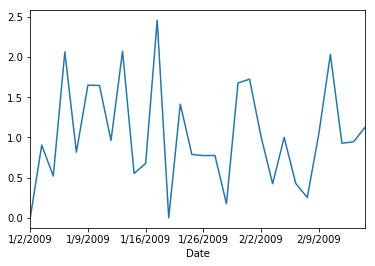

In [25]:
df.drawdown.plot()

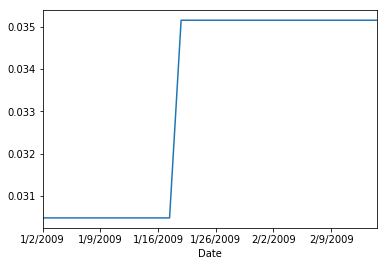

In [26]:
df.cumm_max.plot()

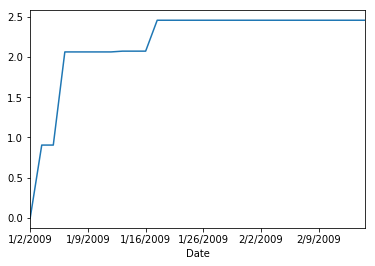

In [27]:
df.max_dd.plot()